<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/haberman_survival_imbal_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
columns = ['age', 'year', 'nodes', 'class']

In [ ]:
from os import name
da1 = pd.read_csv('/content/haberman.csv', header = None, names = columns)

In [ ]:
print(da1.head())

   age  year  nodes  class
0   30    64      1      1
1   30    62      3      1
2   30    65      0      1
3   31    59      2      1
4   31    65      4      1


In [ ]:
print(da1.describe())

              age        year       nodes       class
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


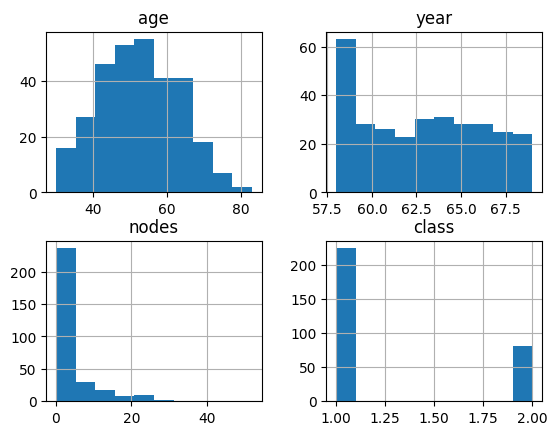

In [ ]:
## hist plot
da1.hist()
plt.show()

In [ ]:
##check class dist
#Method A

tar = da1['class'].value_counts()

In [ ]:
print(tar)

1    225
2     81
Name: class, dtype: int64


In [ ]:
#Method B
tar1 = da1['class'].values
counter = Counter(tar1)

for k, v in counter.items():
  perc = v/len(tar1) * 100
  print(k, v, perc)

1 225 73.52941176470588
2 81 26.47058823529412


In [ ]:
##class '1' and '2' change to 0 and 1

lab_e = LabelEncoder()

da1['new_c1'] = lab_e.fit_transform(da1['class'])

print(da1.head())

   age  year  nodes  class  new_c1
0   30    64      1      1       0
1   30    62      3      1       0
2   30    65      0      1       0
3   31    59      2      1       0
4   31    65      4      1       0


In [ ]:
X = da1.drop('new_c1', axis = 1)
y = da1['new_c1']

In [ ]:
##def mod

In [ ]:
mod = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
#set RepeatedStratKF

In [ ]:
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits = 10, random_state = 42)

In [ ]:
# y_prob1 = cross_val_predict(mod, X, y, cv = cv, method = 'predict_proba')[:, 1]

In [ ]:
## Full Model

##load_data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values
  X, y = da1[:, : -1], da1[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

def brier_skill_score(y_true, y_prob):
  ref_probs = [0.26741 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)

  bs1 = brier_score_loss(y_true, y_prob)

  return 1.0 - (bs1/bs_ref)

def eval_mod(X, y, mod):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

  metric = make_scorer(brier_skill_score, needs_proba = True)

  score1 = cross_val_score(mod, X, y, cv = cv, scoring = metric, n_jobs = -1)

  return score1

path = '/content/haberman.csv'

X, y = load_data(path)

print(X.shape, y.shape, Counter(y))

mod = DummyClassifier(strategy = 'prior')

score1 = eval_mod(X, y, mod)

print(np.mean(score1), np.std(score1))

(306, 3) (306,) Counter({0: 225, 1: 81})
-6.230692116788727e-05 0.00045236725279956905


In [ ]:
## Full Model

##load_data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values
  X, y = da1[:, : -1], da1[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

def brier_skill_score(y_true, y_prob):
  ref_probs = [0.26741 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)

  bs1 = brier_score_loss(y_true, y_prob)

  return 1.0 - (bs1/bs_ref)

def eval_mod(X, y, mod):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

  metric = make_scorer(brier_skill_score, needs_proba = True)

  score1 = cross_val_score(mod, X, y, cv = cv, scoring = metric, n_jobs = -1)

  return score1

path = '/content/haberman.csv'

X, y = load_data(path)

print(X.shape, y.shape, Counter(y))

mod = DummyClassifier(strategy = 'prior')

score1 = eval_mod(X, y, mod)

print(np.mean(score1), np.std(score1))

(306, 3) (306,) Counter({0: 225, 1: 81})
-6.230692116788727e-05 0.00045236725279956905


(306, 3) (306,) Counter({0: 225, 1: 81})
LR 0.07069134532162577 0.12328361994313923
LDA 0.07227861883334466 0.13702595905203915
QDA 0.031887839584699026 0.20402458258824255
GNB 0.01462814594707476 0.19779672602522547
MNB -0.21319682923872982 0.3922689080265039
GPC -0.14317870742552916 0.042651679997179885


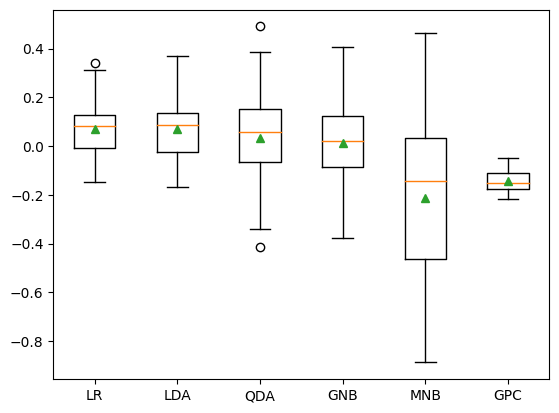

In [ ]:
##Eval Prob

## Full Model

##load_data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values
  X, y = da1[:, : -1], da1[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

def brier_skill_score(y_true, y_prob):
  ref_probs = [0.26741 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)

  bs1 = brier_score_loss(y_true, y_prob)

  return 1.0 - (bs1/bs_ref)

def eval_mod(X, y, mod):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

  metric = make_scorer(brier_skill_score, needs_proba = True)

  score1 = cross_val_score(mod, X, y, cv = cv, scoring = metric, n_jobs = -1)

  return score1

def get_mod():
  model, names = list(), list()

  model.append(LogisticRegression(solver ='lbfgs'))
  names.append('LR')

  model.append(LinearDiscriminantAnalysis())
  names.append('LDA')

  model.append(QuadraticDiscriminantAnalysis())
  names.append('QDA')

  model.append(GaussianNB())
  names.append('GNB')

  model.append(MultinomialNB())
  names.append('MNB')

  model.append(GaussianProcessClassifier())
  names.append('GPC')
  return model, names

path = '/content/haberman.csv'

X, y = load_data(path)

print(X.shape, y.shape, Counter(y))

model, names = get_mod()
res = list()

for i in range(len(model)):
  score1 = eval_mod(X, y, model[i])
  res.append(score1)

  print(names[i], np.mean(score1), np.std(score1))

##create a boxplot

plt.boxplot(res, labels = names, showmeans = True)
plt.show()

In [ ]:
# ##Eval Prob

# ## Full Model

# ##load_data
# def load_data(path):
#   da1 = pd.read_csv(path, header = None)
#   da1 = da1.values
#   X, y = da1[:, : -1], da1[:, -1]
#   y = LabelEncoder().fit_transform(y)
#   return X, y

# def brier_skill_score(y_true, y_prob):
#   ref_probs = [0.26741 for _ in range(len(y_true))]
#   bs_ref = brier_score_loss(y_true, ref_probs)

#   bs1 = brier_score_loss(y_true, y_prob)

#   return 1.0 - (bs1/bs_ref)

# def eval_mod(X, y, mod):
#   cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

#   metric = make_scorer(brier_skill_score, needs_proba = True)

#   score1 = cross_val_score(mod, X, y, cv = cv, scoring = metric, n_jobs = -1)

#   return score1

# def get_mod():
#   model, names = list(), list()

#   model.append(LogisticRegression(solver ='lbfgs'))
#   names.append('LR')

#   model.append(LinearDiscriminantAnalysis())
#   names.append('LDA')

#   model.append(QuadraticDiscriminantAnalysis())
#   names.append('QDA')

#   model.append(GaussianNB())
#   names.append('GNB')

#   model.append(MultinomialNB())
#   names.append('MNB')
#   return model, names

# path = '/content/haberman.csv'

# X, y = load_data(path)

# print(X.shape, y.shape, Counter(y))

# model, names = get_mod()
# res = list()

# for i in range(len(model)):
#   pipeline = Pipeline(steps=[('t', StandardScaler()),('m',model[i])])
#   # evaluate the model and store results
#   scores = eval_mod(X, y, pipeline)
#   res.append(scores)
#   # summarize and store

#   print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

# ##create a boxplot

# plt.boxplot(res, labels = names, showmeans = True)
# plt.show()

>GPC 0.097 (0.133)


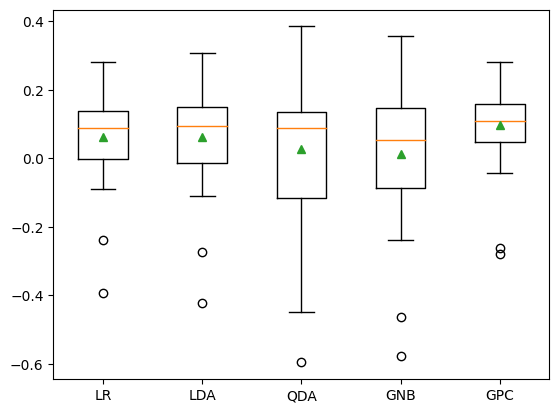

In [ ]:
from numpy import mean, std

# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = pd.read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
  # calculate reference brier score
  ref_probs = [0.26471 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)
  # calculate model brier score
  bs_model = brier_score_loss(y_true, y_prob)
  # calculate skill score
  return 1.0 - (bs_model / bs_ref)
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(brier_skill_score, needs_proba=True)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

def get_models():
  models, names = list(), list()
  #LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LR')
  #LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
# QDA
  models.append(QuadraticDiscriminantAnalysis())
  names.append('QDA')
# GNB
  models.append(GaussianNB())
  names.append('GNB')
# GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  return models, names
# define the location of the dataset
full_path = '/content/haberman.csv'
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
  # create a pipeline
  pipeline = Pipeline(steps=[('t', StandardScaler()),('m',models[i])]) # evaluate the model and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  # summarize and store
print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores))) # plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>GPC 0.100 (0.130)


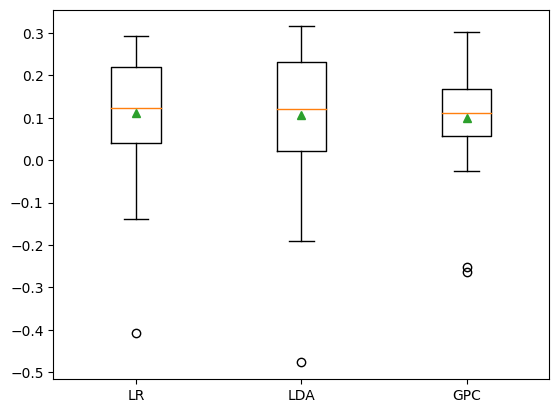

In [ ]:
## Using Power Transf

from numpy import mean, std

# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = pd.read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
  # calculate reference brier score
  ref_probs = [0.26471 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)
  # calculate model brier score
  bs_model = brier_score_loss(y_true, y_prob)
  # calculate skill score
  return 1.0 - (bs_model / bs_ref)
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(brier_skill_score, needs_proba=True)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

def get_models():
  models, names = list(), list()
  #LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LR')
  #LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
# GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  return models, names
# define the location of the dataset
full_path = '/content/haberman.csv'
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
  # create a pipeline
  pipeline = Pipeline(steps=[('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('m', models[i])]) # evaluate the model and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  # summarize and store
print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores))) # plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()